In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
mnist = tf.keras.datasets.mnist
( x_train, y_train ), ( x_test, y_test ) = mnist.load_data()

# Nomalization
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.cast( x_train, tf.float32 )
x_test = tf.cast( x_test, tf.float32 )

print( x_train.shape, y_train.shape )

(60000, 28, 28) (60000,)


In [3]:
nb_classes = 10

In [4]:
# Reshape
x_train = tf.reshape( x_train, [ -1, 784 ] )
x_test = tf.reshape( x_test, [ -1, 784 ] )
print( x_train.shape, x_test.shape )

(60000, 784) (10000, 784)


In [5]:
# one-hot Encoding
y_train = tf.keras.utils.to_categorical( y_train, nb_classes )
y_test = tf.keras.utils.to_categorical( y_test, nb_classes )

# or
# y_train = tf.one_hot( tf.cast( y_train, tf.int32 ), 10 )
# y_train = tf.reshape( y_train, [ -1, 10 ] )
# y_test = tf.reshape( tf.one_hot( y_test, 10 ), [ -1, 10 ] )

print( y_train.shape, y_test.shape )

(60000, 10) (10000, 10)


In [6]:
learning_rate = 0.001
batch_size = 100
training_epochs = 15

In [7]:
W1 = tf.Variable( tf.random.normal( [ 784, 256 ] ) )
b1 = tf.Variable( tf.random.normal( [ 256 ] ) )
def Layer1( X ):
    return ( tf.nn.relu( tf.matmul( X, W1 ) + b1 ) )

W2 = tf.Variable( tf.random.normal( [ 256, 256 ] ) )
b2 = tf.Variable( tf.random.normal( [ 256 ] ) )
def Layer2( X ):
    return ( tf.nn.relu( tf.matmul( Layer1( X ), W2 ) + b2 ) )

W3 = tf.Variable( tf.random.normal( [ 256, nb_classes ] ) )
b3 = tf.Variable( tf.random.normal( [ nb_classes ] ) )
@tf.function
def Hypothesis( X ):
    return (  tf.matmul( Layer2( X ), W3 ) + b3 )

In [8]:
@tf.function
def Cost( X, Y ):
    return ( tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
            logits = Hypothesis( X ), labels = Y )
    ) )

def Minimize( X, Y ):
    loss = lambda: Cost( X ,Y )
    
    tf.keras.optimizers.Adam( learning_rate ).minimize( loss, [ W1, W2, W3, b1, b2, b3 ] )

In [9]:
def CorrectPrediction( X, Y ):
    return ( tf.equal( tf.argmax( Hypothesis( X ), axis = 1 ),
                      tf.argmax( Y, axis = 1 ) ) )

def Accuracy( X, Y ):
    return ( tf.reduce_mean( tf.cast( CorrectPrediction( X, Y ), tf.float32 ) ) )

In [11]:
for epoch in range( training_epochs ):
    avg_cost = 0
    total_batch = int( len( x_train ) / batch_size )
    
    start_batch, end_batch = 0, batch_size
    for i in range( total_batch ):
        batch_xs, batch_ys = \
            x_train[ start_batch : end_batch ], y_train[start_batch : end_batch ]
        
        Minimize( batch_xs, batch_ys )
        cost_val = Cost( batch_xs, batch_ys )
        
        avg_cost += cost_val / total_batch
        
        start_batch = start_batch + batch_size
        end_batch = end_batch + batch_size
    
    print( 'Epoch: {:04d}, Cost: {:.9f}'.format( epoch + 1, avg_cost ) )
    
print( 'Learning finished' )
        
    

Epoch: 0001, Cost: 124.373878479
Epoch: 0002, Cost: 27.228315353
Epoch: 0003, Cost: 17.050607681
Epoch: 0004, Cost: 12.281278610
Epoch: 0005, Cost: 9.408424377
Epoch: 0006, Cost: 7.602550983
Epoch: 0007, Cost: 6.278292179
Epoch: 0008, Cost: 5.172177315
Epoch: 0009, Cost: 4.435844898
Epoch: 0010, Cost: 3.830260277
Epoch: 0011, Cost: 3.340939760
Epoch: 0012, Cost: 2.931663275
Epoch: 0013, Cost: 2.572320223
Epoch: 0014, Cost: 2.286472797
Epoch: 0015, Cost: 2.002308846
Learning finished


In [12]:
tf.print( 'Accuracy: ', Accuracy( x_test, y_test ))

Accuracy:  0.9422


In [13]:
r = random.randint( 0, len( x_test ) - 1 )
tf.print( 'Label: ', tf.argmax( y_test[ r: r + 1 ], axis = 1 ) )
tf.print( 
    'Prediction: ', tf.argmax(Hypothesis( x_test[ r: r + 1] ), axis = 1 ) )

Label:  [8]
Prediction:  [8]


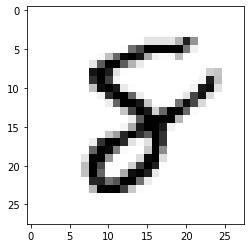

In [14]:
plt.imshow( 
    tf.reshape( x_test[ r: r + 1], [ 28, 28 ] ),
    cmap = 'Greys',
    interpolation = 'nearest'
)
plt.show()